In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

In [2]:
df = pd.read_csv('cdc_diabetes_data.csv', encoding='utf-8-sig')

df.isnull().sum()

ID                                   0
Diabeto indikatorius                 0
Aukštas kraujospūdis                 0
Aukštas cholesterolis                0
Cholesterolio patikrinimas           0
KMI                                  0
Rūkymas                              0
Insultas                             0
širdies ligos ar infarktas           0
Fizinė veikla                        0
Vaisiai                              0
Daržovės                             0
Gausus alkoholio vartojimas          0
Sveikatos draudimas                  0
Nenuėjimas pas daktarą dėl kainos    0
Bendra sveikata                      0
Psichologinė sveikata                0
Fizinė sveikata                      0
Judėjimo sunkumai                    0
Lytis                                0
Amžius                               0
Išsilavinimas                        0
Pajamos                              0
dtype: int64

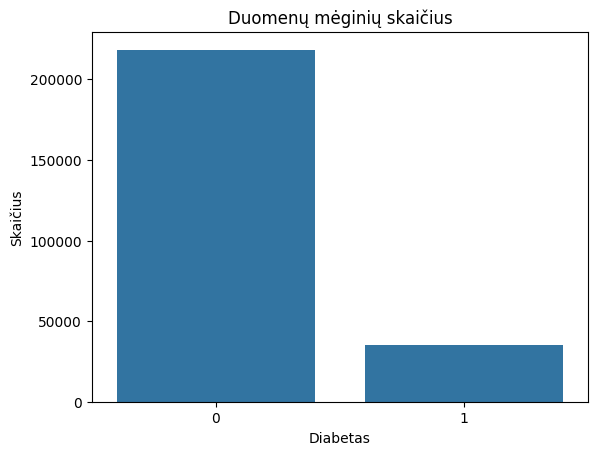

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('cdc_diabetes_data.csv')
df.drop(columns=['ID'], inplace=True)
sns.countplot(x = 'Diabeto indikatorius', data = df)
plt.title("Duomenų mėginių skaičius")
plt.ylabel("Skaičius")
plt.xlabel("Diabetas")
#plt.savefig("diabetes_unmodified_class_imbalance.png", dpi=300, bbox_inches='tight')


plt.show()

In [4]:
X = df.drop(['Diabeto indikatorius'],axis = 1)
Y = df['Diabeto indikatorius']
counts = Y.value_counts()

percentages = Y.value_counts(normalize=True) * 100

print("Counts of each class:")
print(counts)

print("\nPercentages of each class:")
print(percentages)

Counts of each class:
Diabeto indikatorius
0    218334
1     35346
Name: count, dtype: int64

Percentages of each class:
Diabeto indikatorius
0    86.066698
1    13.933302
Name: proportion, dtype: float64


Training Set Distribution:
 Diabeto indikatorius
0    152729
1     24847
Name: count, dtype: int64
Testing Set Distribution:
 Diabeto indikatorius
0    65605
1    10499
Name: count, dtype: int64


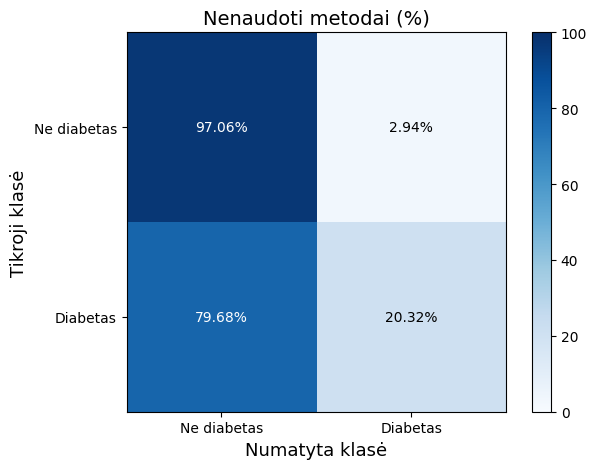

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
train_distribution = Y_train.value_counts() 
print("Training Set Distribution:\n", train_distribution)

test_distribution = Y_test.value_counts() 
print("Testing Set Distribution:\n", test_distribution)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train, Y_train)

Y_pred = mlp.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100)  
plt.title('Nenaudoti metodai (%)', fontsize=14)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne diabetas', 'Diabetas'], fontsize=10)
ax.set_yticklabels(['Ne diabetas', 'Diabetas'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=13)
plt.ylabel("Tikroji klasė", fontsize=13)
plt.tight_layout()
plt.savefig("diabetes_unmodified_cconfusion matrix.png", dpi=300, bbox_inches='tight')
plt.show()


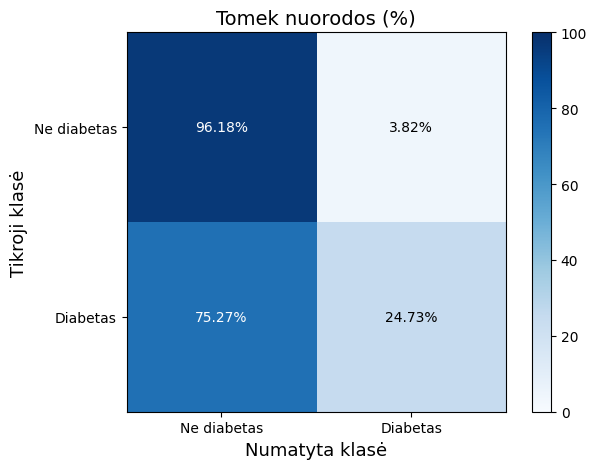

In [6]:
# Sumaišties matrica naudojant Tomek nuorodas 
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
df = pd.read_csv('cdc_diabetes_data.csv', encoding='utf-8-sig')

df.drop(columns=['ID'], inplace=True)

X = df.drop(columns=['Diabeto indikatorius'])
y = df['Diabeto indikatorius']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=7, stratify=y
)

tomek = TomekLinks()
X_train_resampled, y_train_resampled = tomek.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7)
mlp.fit(X_train_resampled, y_train_resampled)

test_preds = mlp.predict(X_test)
report = classification_report(y_test, test_preds, target_names=['Ne diabetas', 'Diabetas'])

cm = confusion_matrix(y_test, test_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100) 
plt.title('Tomek nuorodos (%)', fontsize=14)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne diabetas', 'Diabetas'], fontsize=10)
ax.set_yticklabels(['Ne diabetas', 'Diabetas'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=13)
plt.ylabel("Tikroji klasė", fontsize=13)
plt.tight_layout()
#plt.savefig("diabetes_tomek_links_cconfusion matrix.png", dpi=300, bbox_inches='tight')
plt.show()


Classification Report:
               precision    recall  f1-score   support

 Ne diabetas       0.93      0.75      0.83     65500
    Diabetas       0.30      0.65      0.41     10604

    accuracy                           0.74     76104
   macro avg       0.61      0.70      0.62     76104
weighted avg       0.84      0.74      0.77     76104



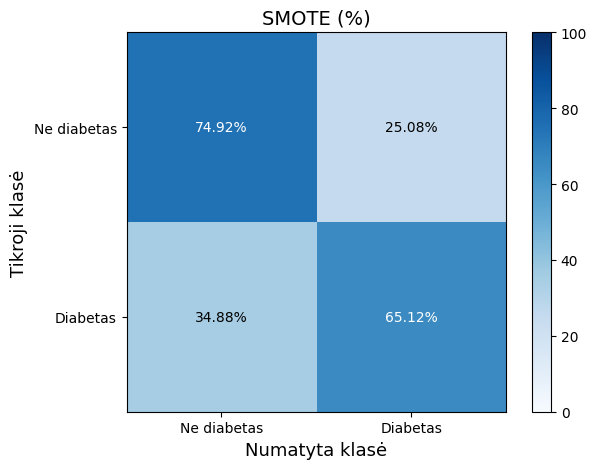

In [7]:
# Sumaišties matrica naudojant SMOTE
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
df = pd.read_csv('cdc_diabetes_data.csv', encoding='utf-8-sig')

df.drop(columns=['ID'], inplace=True)

X = df.drop(columns=['Diabeto indikatorius'])
y = df['Diabeto indikatorius']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=7, stratify=y
)

smote = SMOTE(sampling_strategy=0.99, random_state=7)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7)
mlp.fit(X_train_resampled, y_train_resampled)

test_preds = mlp.predict(X_test)
report = classification_report(y_test, test_preds, target_names=['Ne diabetas', 'Diabetas'])
print("Classification Report:\n", report)


cm = confusion_matrix(y_test, test_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100)  
plt.title('SMOTE (%)', fontsize=14)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne diabetas', 'Diabetas'], fontsize=10)
ax.set_yticklabels(['Ne diabetas', 'Diabetas'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=13)
plt.ylabel("Tikroji klasė", fontsize=13)
plt.tight_layout()
#plt.savefig("diabetes_smote_cconfusion matrix.png", dpi=300, bbox_inches='tight')
plt.show()


Classification Report:
               precision    recall  f1-score   support

 Ne diabetas       0.93      0.71      0.81     65500
    Diabetas       0.28      0.68      0.39     10604

    accuracy                           0.71     76104
   macro avg       0.61      0.70      0.60     76104
weighted avg       0.84      0.71      0.75     76104



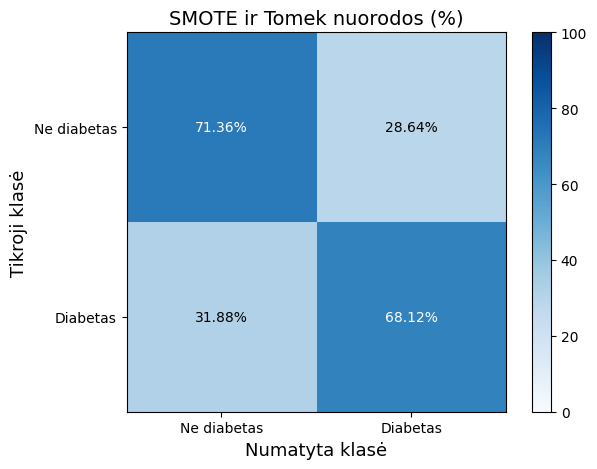

In [8]:
# Sumaišties matrica naudojant SMOTE ir Tomek nuorodas

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer


df = pd.read_csv('cdc_diabetes_data.csv', encoding='utf-8-sig')

df.drop(columns=['ID'], inplace=True)

X = df.drop(columns=['Diabeto indikatorius'])
y = df['Diabeto indikatorius']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=7, stratify=y
)

smotetomek = SMOTETomek(sampling_strategy=0.99, random_state=7)
X_train_resampled, y_train_resampled = smotetomek.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7)
mlp.fit(X_train_resampled, y_train_resampled)

test_preds = mlp.predict(X_test)
report = classification_report(y_test, test_preds, target_names=['Ne diabetas', 'Diabetas'])
print("Classification Report:\n", report)

cm = confusion_matrix(y_test, test_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100) 
plt.title('SMOTE ir Tomek nuorodos (%)', fontsize=14)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne diabetas', 'Diabetas'], fontsize=10)
ax.set_yticklabels(['Ne diabetas', 'Diabetas'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=13)
plt.ylabel("Tikroji klasė", fontsize=13)
plt.tight_layout()
#plt.savefig("diabetes_smote_tomek_links_cconfusion matrix.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Sumaišties matrica naudojant SMOTE-ENN

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek


df = pd.read_csv('cdc_diabetes_data.csv', encoding='utf-8-sig')

df.drop(columns=['ID'], inplace=True)

X = df.drop(columns=['Diabeto indikatorius'])
y = df['Diabeto indikatorius']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=7, stratify=y
)

smoteenn = SMOTEENN(sampling_strategy=0.99, random_state=7)
X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7)
mlp.fit(X_train_resampled, y_train_resampled)

test_preds = mlp.predict(X_test)
report = classification_report(y_test, test_preds, target_names=['Ne diabetas', 'Diabetas'])
print("Classification Report:\n", report)

cm = confusion_matrix(y_test, test_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100)  
plt.title('SMOTE-ENN (%)', fontsize=14)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne diabetas', 'Diabetas'], fontsize=10)
ax.set_yticklabels(['Ne diabetas', 'Diabetas'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=13)
plt.ylabel("Tikroji klasė", fontsize=13)
plt.tight_layout()
#plt.savefig("diabetes_smote_enn_cconfusion matrix.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Sumaišties matrica naudojant ribiniu SMOTE

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek


df = pd.read_csv('cdc_diabetes_data.csv', encoding='utf-8-sig')

df.drop(columns=['ID'], inplace=True)

X = df.drop(columns=['Diabeto indikatorius'])
y = df['Diabeto indikatorius']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=7, stratify=y
)

borderline_smote = BorderlineSMOTE(sampling_strategy=0.99, random_state=7)
X_train_resampled, y_train_resampled = borderline_smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7)
mlp.fit(X_train_resampled, y_train_resampled)

test_preds = mlp.predict(X_test)
report = classification_report(y_test, test_preds, target_names=['Ne diabetas', 'Diabetas'])
print("Classification Report:\n", report)

cm = confusion_matrix(y_test, test_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100)  
plt.title('Ribinis SMOTE (%)', fontsize=14)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne diabetas', 'Diabetas'], fontsize=10)
ax.set_yticklabels(['Ne diabetas', 'Diabetas'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=13)
plt.ylabel("Tikroji klasė", fontsize=13)
plt.tight_layout()
#plt.savefig("diabetes_smote_borderline_cconfusion matrix.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# Sumaišties matrica naudojant ADASYN

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek


df = pd.read_csv('cdc_diabetes_data.csv', encoding='utf-8-sig')

df.drop(columns=['ID'], inplace=True)

X = df.drop(columns=['Diabeto indikatorius'])
y = df['Diabeto indikatorius']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=7, stratify=y
)

adasyn = ADASYN(sampling_strategy=0.99, random_state=7)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7)
mlp.fit(X_train_resampled, y_train_resampled)

test_preds = mlp.predict(X_test)
report = classification_report(y_test, test_preds, target_names=['Ne diabetas', 'Diabetas'])
print("Classification Report:\n", report)

cm = confusion_matrix(y_test, test_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues)
plt.title('ADASYN (%)')
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne diabetas', 'Diabetas'])
ax.set_yticklabels(['Ne diabetas', 'Diabetas'])
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė")
plt.ylabel("Tikroji klasė")
plt.tight_layout()
#plt.savefig("diabetes_adasyn_cconfusion matrix.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Sumaišties matrica naudojant ADASYN ir Tomek nuorodas

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek


df = pd.read_csv('cdc_diabetes_data.csv', encoding='utf-8-sig')

df.drop(columns=['ID'], inplace=True)

X = df.drop(columns=['Diabeto indikatorius'])
y = df['Diabeto indikatorius']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=7, stratify=y
)

adasyn = ADASYN(sampling_strategy=0.99, random_state=7)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

tomek = TomekLinks()
X_train_resampled, y_train_resampled = tomek.fit_resample(X_resampled, y_resampled)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7)
mlp.fit(X_train_resampled, y_train_resampled)

test_preds = mlp.predict(X_test)
report = classification_report(y_test, test_preds, target_names=['Ne diabetas', 'Diabetas'])
print("Classification Report:\n", report)

cm = confusion_matrix(y_test, test_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100)  
plt.title('ADASYN ir Tomek nuorodos (%)', fontsize=14)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne diabetas', 'Diabetas'], fontsize=10)
ax.set_yticklabels(['Ne diabetas', 'Diabetas'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=13)
plt.ylabel("Tikroji klasė", fontsize=13)
plt.tight_layout()
#plt.savefig("diabetes_adasyn_tomek_links_cconfusion matrix.png", dpi=300, bbox_inches='tight')
plt.show()